In [1]:
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
import pandas as pd
import numpy as np

# Plotting Functions in pandas

### ~ Line Plots

In [2]:
rand = np.random.randn

In [20]:
s = Series(rand(10).cumsum(), index=np.arange(0,100,10))
ax = s.plot()

In [19]:
plt.figure()

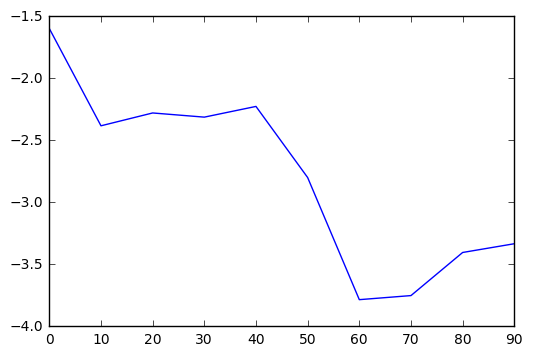

In [21]:
plt.show()

In [ ]:
df = DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10))

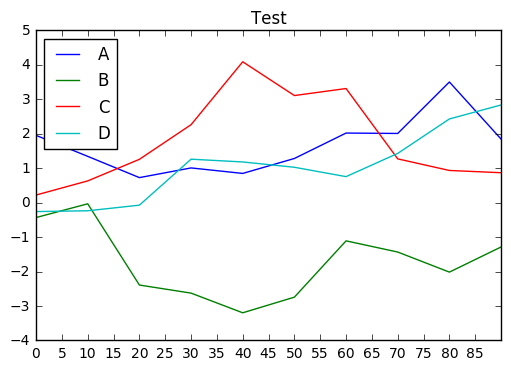

In [30]:
plt.figure()
df.plot(xticks=np.arange(0, 90, 5), title='Test')
plt.show()

### ~Bar Plot

In [40]:
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data

a    0.777441
b    0.933401
c    0.858439
d    0.525488
e    0.903988
f    0.420489
g    0.610313
h    0.463993
i    0.870415
j    0.392427
k    0.775870
l    0.054507
m    0.083973
n    0.475982
o    0.340734
p    0.589081
dtype: float64

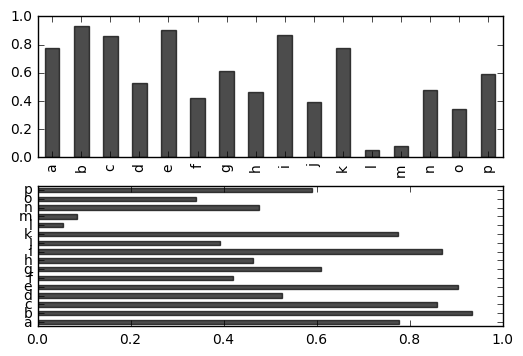

In [55]:
fig, axes = plt.subplots(2, 1)
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)
plt.show()

In [52]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.755682,0.191489,0.531229,0.538335
two,0.683997,0.231152,0.007285,0.822145
three,0.777105,0.087887,0.419694,0.453032
four,0.321952,0.414177,0.186319,0.590752
five,0.517271,0.926980,0.936998,0.648519
six,0.090419,0.206306,0.823364,0.006476


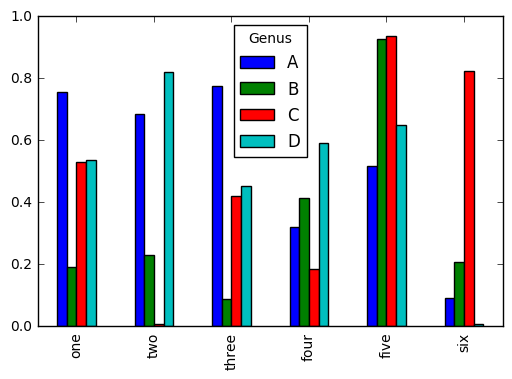

In [56]:
df.plot(kind='bar')
plt.show()

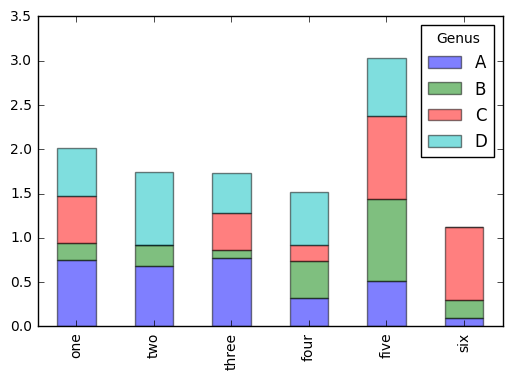

In [57]:
df.plot(kind='bar', stacked=True, alpha=.5)
plt.show()

#### A useful recipe for bar plots (as seen in an earlier chapter) is to visualize a Series’s value frequency using value_counts: s.value_counts ().plot(kind='bar')

In [67]:
s = Series( np.random.randint(5,size=100) )

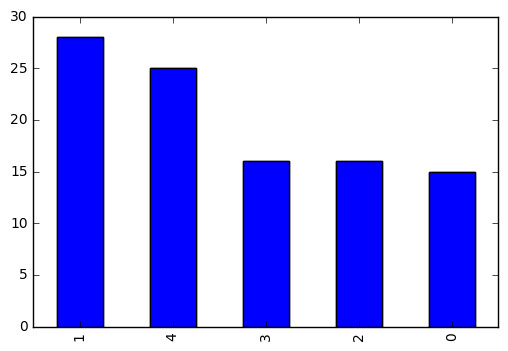

In [71]:
s.value_counts().plot(kind='bar')
plt.show()

In [72]:
tips = pd.read_csv('https://github.com/wesm/pydata-book/raw/master/ch08/tips.csv')

In [83]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [86]:
party_counts = pd.crosstab(tips.day, tips['size'])

In [87]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [88]:
party_counts = party_counts.ix[:, 2:5]
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)

In [89]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


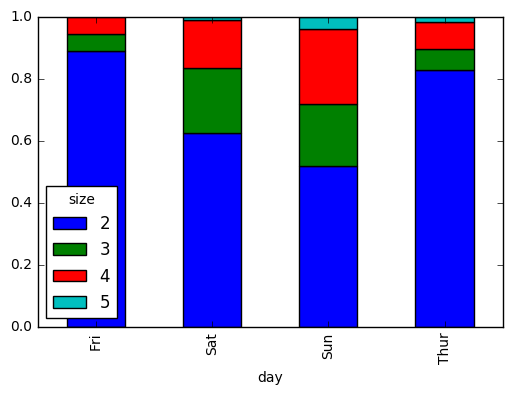

In [92]:
party_pcts.plot(kind='bar', stacked=True)
plt.show()

### ~Histograms and Density Plots

In [94]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [103]:
tips['tip_pct'].hist(bins=50)

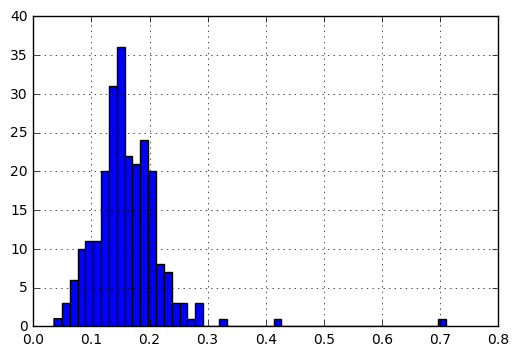

In [96]:
plt.show()

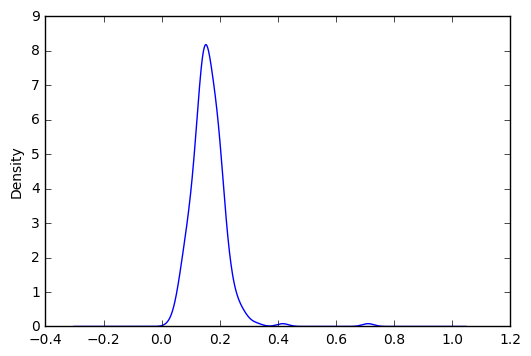

In [105]:
tips['tip_pct'].plot(kind='kde')
plt.show()

These two plot types are often plotted together; the histogram in normalized form (to
give a binned density) with a kernel density estimate plotted on top.

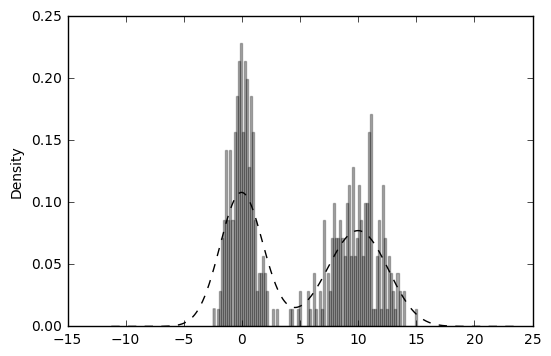

In [106]:
comp1 = np.random.normal(0, 1, size=200) # N(0, 1)
comp2 = np.random.normal(10, 2, size=200) # N(10, 4)
values = Series(np.concatenate([comp1, comp2]))

values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')
plt.show()

### ~Scatter plots

In [107]:
macro = pd.read_csv('https://github.com/wesm/pydata-book/raw/master/ch08/macrodata.csv')

In [108]:
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [109]:
data = macro[['cpi','m1','tbilrate','unemp']]

In [110]:
trans_data = np.log(data).diff().dropna()

In [111]:
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In exploratory data analysis it’s helpful to be able to look at all the scatter plots among
a group of variables; this is known as a pairs plot or scatter plot matrix.

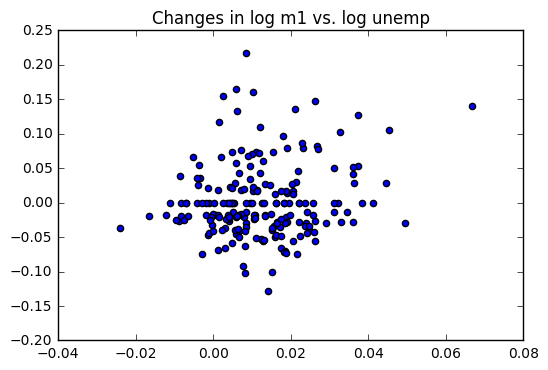

In [115]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))
plt.show()

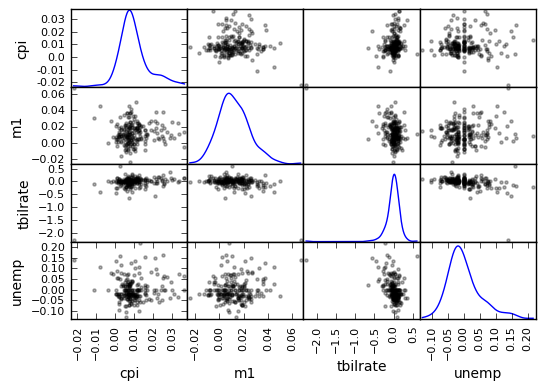

In [120]:
pd.scatter_matrix(trans_data, diagonal='kde', c='k', alpha=0.3)
plt.show()

# Plotting Maps: Visualizing Haiti Earthquake Crisis Data

In [122]:
data = pd.read_csv('https://github.com/wesm/pydata-book/blob/master/ch08/Haiti.csv?raw=true')
data.head()

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO


In [124]:
data.dtypes

Serial              int64
INCIDENT TITLE     object
INCIDENT DATE      object
LOCATION           object
DESCRIPTION        object
CATEGORY           object
LATITUDE          float64
LONGITUDE         float64
APPROVED           object
VERIFIED           object
dtype: object

In [127]:
data[[2,6,7]].head()

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671


In [130]:
data[[5]].head()

,CATEGORY
0,"1. Urgences | Emergency, 3. Public Health,"
1,"1. Urgences | Emergency, 2. Urgences logistiqu..."
2,"2. Urgences logistiques | Vital Lines, 8. Autr..."
3,"1. Urgences | Emergency,"
4,"1. Urgences | Emergency,"


In [131]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [132]:
data = data[(data.LATITUDE > 18)
            & (data.LATITUDE < 20)
            & (data.LONGITUDE > -75) 
            & (data.LONGITUDE < -70) 
            & data.CATEGORY.notnull()]

In [133]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

In [134]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [135]:
all_cats = get_all_categories(data.CATEGORY)

In [137]:
all_cats[:5]

['1. Urgences | Emergency',
 '1a. Highly vulnerable',
 '1b. Urgence medicale | Medical Emergency',
 '1c. Personnes prises au piege | People trapped',
 '1d. Incendie | Fire']

In [138]:
english_mapping = dict(get_english(x) for x in all_cats)

In [139]:
english_mapping['2a']

'Food Shortage'

In [140]:
english_mapping['6c']

'Earthquake and aftershocks'

In [141]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

In [142]:
all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),index=data.index, columns=code_index)

In [144]:
dummy_frame.ix[:, :6].head()

,1,1a,1b,1c,1d,2
0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1
data = data.join(dummy_frame.add_prefix('category_'))

In [146]:
data.ix[:, 10:15].head()

,category_1,category_1a,category_1b,category_1c,category_1d
0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0
